In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

df = pd.read_csv('cancer.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# EDA
print("shape ", df.shape)
print('missing values: ', df.isnull().sum())
print("duplicates: ", df.duplicated().sum())
print("class distribution ", df['Level'].value_counts())

shape  (1000, 26)
missing values:  index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64
duplicates:  0
class distribution  Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


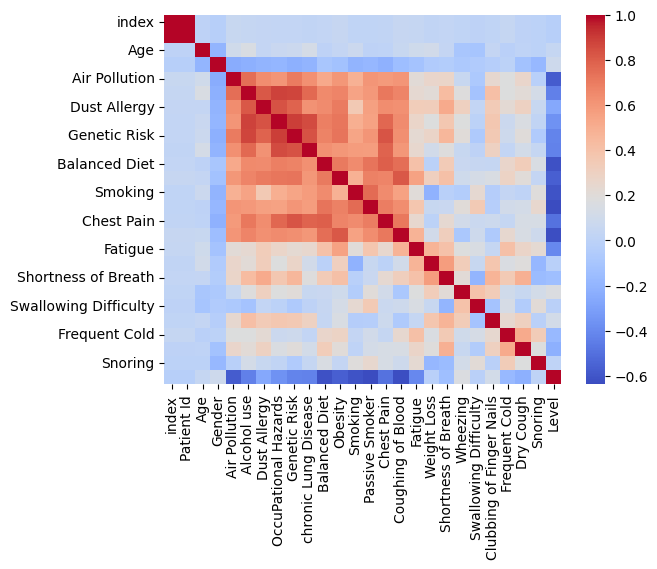

corr with target Level                       1.000000
Passive Smoker              0.638409
Coughing of Blood           0.631118
Balanced Diet               0.618781
Smoking                     0.611087
Air Pollution               0.577269
Obesity                     0.561961
Chest Pain                  0.494704
Alcohol use                 0.434071
chronic Lung Disease        0.432405
Genetic Risk                0.423382
Fatigue                     0.403276
OccuPational Hazards        0.363748
Dust Allergy                0.264926
Dry Cough                   0.228720
Frequent Cold               0.171678
Wheezing                    0.167773
Shortness of Breath         0.140178
Clubbing of Finger Nails    0.116746
Gender                      0.086222
Age                         0.042631
Patient Id                  0.024556
index                       0.024556
Weight Loss                 0.020537
Snoring                     0.014280
Swallowing Difficulty       0.012880
Name: Level, dtype: f

In [8]:
# there is none, but writing for learning, handle empty, categorical, duplicated records
df.drop_duplicates(inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# correlation and feature scaling PEARSON
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

corr_target = corr['Level'].abs().sort_values(ascending=False)
print("corr with target", corr_target)

In [14]:
# feature scaling
X = df.drop('Level', axis=1)
y = df['Level']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# train80 test20 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train 70 test 30 split
X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

metrics = ['euclidean', 'manhattan', 'minkowski']
results = []

for m in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=m)
    knn.fit(X_train_main, y_train_main)

    # accuracy checks   
    train_acc = accuracy_score(y_train_main, knn.predict(X_train_main))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    val_acc = accuracy_score(y_val, knn.predict(X_val))

    results.append([m, train_acc, test_acc, val_acc])

print(results)


[['euclidean', 1.0, 1.0, 1.0], ['manhattan', 1.0, 1.0, 1.0], ['minkowski', 1.0, 1.0, 1.0]]


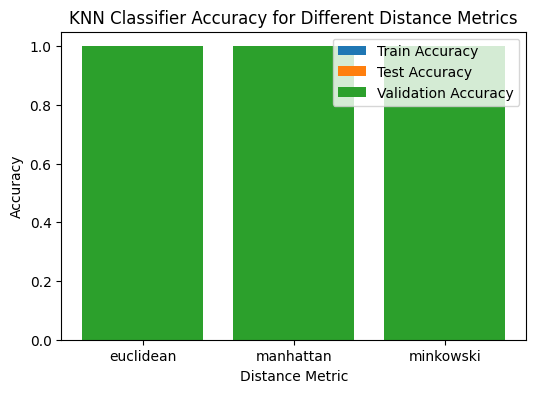

In [ ]:
# visualize (gpt generated)
plt.figure(figsize=(6,4))
plt.bar(['euclidean', 'manhattan', 'minkowski'], [results[0][1], results[1][1], results[2][1]], label='Train Accuracy')
plt.bar(['euclidean', 'manhattan', 'minkowski'], [results[0][2], results[1][2], results[2][2]], label='Test Accuracy')
plt.bar(['euclidean', 'manhattan', 'minkowski'], [results[0][3], results[1][3], results[2][3]], label='Validation Accuracy')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different Distance Metrics')
plt.legend()
plt.show()